In [93]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Creating DataFrame
# Binary pixel patterns for letters A, B, C (5x6 grid flattened to 30)
a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

b = [1,1,1,1,1,0,
     1,0,0,0,0,1,
     1,1,1,1,1,0,
     1,0,0,0,0,1,
     1,1,1,1,1,0]

c = [0,1,1,1,1,0,
     1,0,0,0,0,1,
     1,0,0,0,0,0,
     1,0,0,0,0,1,
     0,1,1,1,1,0]

# Prepare input and output arrays
X = np.array([a, b, c]).reshape(3, 30)  # 3 samples, 30 features each
y = np.array([[1,0,0], [0,1,0], [0,0,1]])  # One-hot encoded labels for A, B, C

In [97]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with small random values
        self.w1 = np.random.randn(input_size, hidden_size) * 0.1
        self.w2 = np.random.randn(hidden_size, output_size) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # Derivative of sigmoid assuming x = sigmoid(z)
        return x * (1 - x)

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.w1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2)
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def train(self, X, y, epochs=1000, lr=0.1):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Compute Mean Squared Error loss
            loss = np.mean((output - y)**2)
            losses.append(loss)

            # Backpropagation
            error = output - y
            d_output = error * self.sigmoid_deriv(output)

            error_hidden = d_output.dot(self.w2.T)
            d_hidden = error_hidden * self.sigmoid_deriv(self.a1)

            # Gradient descent weight update
            self.w2 -= lr * self.a1.T.dot(d_output)
            self.w1 -= lr * X.T.dot(d_hidden)

        return losses

    def predict(self, x):
        # Predict class index for input x
        output = self.forward(x)
        return np.argmax(output, axis=1)[0]


In [99]:
# Training the Model
nn = NeuralNetwork(input_size=30, hidden_size=4, output_size=3)
losses = nn.train(X, y, epochs=2000, lr=0.1)

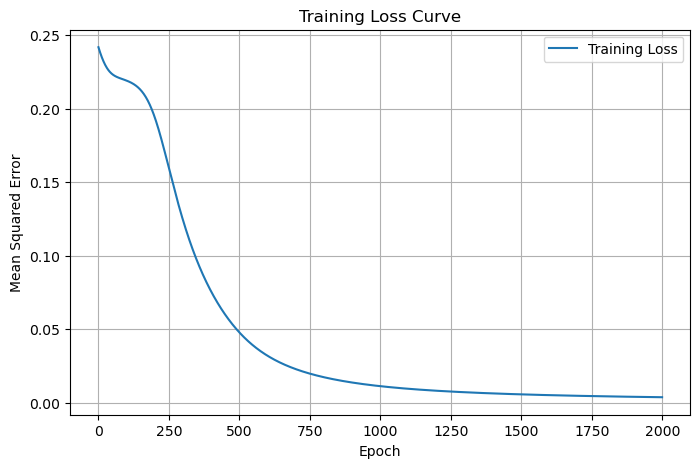

In [101]:
# Visualizing Training Loss
plt.figure(figsize=(8,5))
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Actual Letter: B
Predicted Letter: B


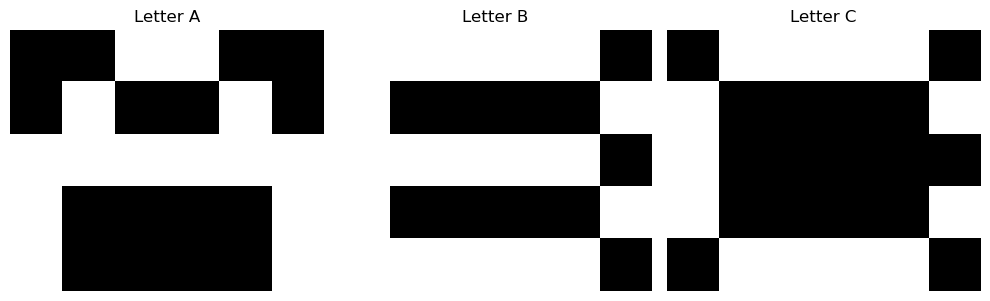

In [105]:
# Testing and Visualizing the Prediction
# Choose a test sample (e.g., letter B)
test_index = 1  # 0 for A, 1 for B, 2 for C
test_sample = X[test_index].reshape(1, -1)

predicted_class = nn.predict(test_sample)
print(f"Actual Letter: {['A','B','C'][test_index]}")
print(f"Predicted Letter: {['A','B','C'][predicted_class]}")

# Display all letter images (A, B, C) side by side
letters = ['A', 'B', 'C']

plt.figure(figsize=(10, 4))
for i in range(len(X)):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i].reshape(5, 6), cmap='gray')
    plt.title(f"Letter {letters[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
